# DataCo Supply Chain Big Data Analysis

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.
Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.
The objective of this analysis is to predict late delivery risk that the company faced. 

---

Data Description :
* Type : Type of transaction made
* Days for shipping (real)      : Actual shipping days of the purchased product
* Days for shipment (scheduled) : Days of scheduled delivery of the purchased product
* Benefit per order : Earnings per order placed
* Sales per customer : Total sales per customer made per customer
* Delivery Status : Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
* Late_delivery_risk            : Categorical variable that indicates if sending is late (1), it is not late (0).
* Category Id : Product category code
* Category Name : Description of the product category
* Customer City : City where the customer made the purchase
* Customer Country : Country where the customer made the purchase
* Customer Email : Customer's email
* Customer Fname : Customer name
* Customer Id : Customer ID
* Customer Lname : Customer lastname
* Customer Password : Masked customer key
* Customer Segment : Types of Customers: Consumer , Corporate , Home Office
* Customer State : State to which the store where the purchase is registered belongs
* Customer Street : Street to which the store where the purchase is registered belongs
* Customer Zipcode : Customer Zipcode
* Department Id : Department code of store
* Department Name : Department name of store
* Latitude : Latitude corresponding to location of store
* Longitude : Longitude corresponding to location of store
* Market : Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
* Order City : Destination city of the order
* Order Country : Destination country of the order
* Order Customer Id : Customer order code
* order date (DateOrders) : Date on which the order is made
* Order Id : Order code
* Order Item Cardprod Id : Product code generated through the RFID reader
* Order Item Discount : Order item discount value
* Order Item Discount Rate      : Order item discount percentage
* Order Item Id : Order item code
* Order Item Product Price      : Price of products without discount
* Order Item Profit Ratio : Order Item Profit Ratio
* Order Item Quantity : Number of products per order
* Sales : Value in sales
* Order Item Total   : Total amount per order
* Order Profit Per Order : Order Profit Per Order
* Order Region : Region of the world where the order is delivered : Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia , Europe , Central America, Eastern Europe , South of USA 
* Order State : State of the region where the order is delivered
* Order Status : Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW
* Product Card Id : Product code
* Product Category Id : Product category code
* Product Description : Product Description
* Product Image : Link of visit and purchase of the product
* Product Name : Product Name
* Product Price : Product Price
* Product Status : Status of the product stock :If it is 1 not available , 0 the product is available 
* Shipping date (DateOrders)    : Exact date and time of shipment
* Shipping Mode : The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

# Data Preparation & Profilling

## Library

In [3]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import *
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

## Data Load & Profiling

In [5]:
# Connect to Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Playground/DataCo Supply Chain

/content/gdrive/MyDrive/Colab Notebooks/Playground/DataCo Supply Chain


In [7]:
data = pd.read_csv('DataCoSupplyChainDataset.csv',encoding ='latin')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

The data have 180519 rows and 53 columns. The columns consist of 14 int64, 15 float64, and 24 object columns.

In [9]:
# Checking null data
data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


As we can see on the summary above, the data have much null values on columns Order Zipcode and Product Description, also 3 rows on Customer Zipcode. These things must be handling first before starting for modelling.

In [10]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
16,order date (DateOrders),65752
22,shipping date (DateOrders),63701
11,Customer Street,7458
14,Order City,3597
7,Customer Lname,1109
18,Order State,1089
6,Customer Fname,782
3,Customer City,563
15,Order Country,164
20,Product Image,118


From what we can see, the data have so many columns with high cardinality, we need to encoding these columns using domain knowledge.

In [11]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02/03/18 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


There is few changes we need to perform before starting analysis. First, we need to make date columns change from object to datetime.

In [12]:
# Change all date data to date format and take only date
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)']).dt.date
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)']).dt.date
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])

In [13]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15,Standard Class


## Preprocessing

As we know, we only need few features from the data to analyze the RFM of our dataset. They are order date (DateOrders), Customer Id, Order Id, and Order Item Total. Also we need Product Card Id, because we try to analyze the movement of each product.

In [14]:
data_rfm = data[['order date (DateOrders)', 'Customer Id', 'Order Id', 'Product Card Id', 'Order Item Total']].copy()
data_rfm

,order date (DateOrders),Customer Id,Order Id,Product Card Id,Order Item Total
0,2018-01-31,20755,77202,1360,314.640015
1,2018-01-13,19492,75939,1360,311.359985
2,2018-01-13,19491,75938,1360,309.720001
3,2018-01-13,19490,75937,1360,304.809998
4,2018-01-13,19489,75936,1360,298.250000
...,...,...,...,...,...
180514,2016-01-16,1005,26043,1004,399.980011
180515,2016-01-16,9141,26037,1004,395.980011
180516,2016-01-15,291,26024,1004,391.980011
180517,2016-01-15,2813,26022,1004,387.980011


In [15]:
# Recheck null data
data_rfm.isna().sum()

order date (DateOrders)    0
Customer Id                0
Order Id                   0
Product Card Id            0
Order Item Total           0
dtype: int64

In [16]:
# Rename few columns
data_rfm.rename(columns={'order date (DateOrders)': 'Order Date',
                         'Product Card Id': 'SKU',
                         'Order Item Total': 'GMV'}, inplace=True)

In [17]:
# Make sure that GMV > 0
data_rfm = data_rfm[data_rfm['GMV']>0]

In [18]:
data_rfm

,Order Date,Customer Id,Order Id,SKU,GMV
0,2018-01-31,20755,77202,1360,314.640015
1,2018-01-13,19492,75939,1360,311.359985
2,2018-01-13,19491,75938,1360,309.720001
3,2018-01-13,19490,75937,1360,304.809998
4,2018-01-13,19489,75936,1360,298.250000
...,...,...,...,...,...
180514,2016-01-16,1005,26043,1004,399.980011
180515,2016-01-16,9141,26037,1004,395.980011
180516,2016-01-15,291,26024,1004,391.980011
180517,2016-01-15,2813,26022,1004,387.980011


## Feature Engineering

In [19]:
# Check time range
data_rfm['Order Date'].max()

Timestamp('2018-01-31 00:00:00')

In [20]:
# Put maximum date as analysis date
analysis_date = data_rfm['Order Date'].max()

In [21]:
# Create data object for rfm modeling
data_for_model = data_rfm.groupby(['SKU'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date - x.max()).days,
        'Order Id': 'count',
        'GMV': 'sum'})

In [22]:
# Renaming columns as R F M
data_for_model.rename(columns={'Order Date': 'Recency',
                         'Order Id': 'Frequency',
                         'GMV': 'Monetary'}, inplace=True)

In [23]:
data_for_model

,SKU,Recency,Frequency,Monetary
0,19,143,64,7256.879885
1,24,145,74,16653.069852
2,35,142,65,9386.549972
3,37,284,262,24626.510213
4,44,285,305,50354.210668
...,...,...,...,...
113,1359,21,492,37318.299847
114,1360,0,357,105063.611511
115,1361,0,529,5485.679968
116,1362,0,838,29919.199869


# RFM Segmentation

In [24]:
# Create RFM segmentation by using rfm_table_order fuction
r_labels = range(3, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 4)

r_groups = pd.qcut(data_for_model['Recency'], q=3, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=3, labels = f_labels)
m_groups = pd.qcut(data_for_model['Monetary'], q=3, labels = m_labels)

In [25]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [26]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [27]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

In [28]:
# Check Final Result
data_for_model.head()

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score
0,19,143,64,7256.879885,2,1,1,211
1,24,145,74,16653.069852,2,2,2,222
2,35,142,65,9386.549972,2,1,1,211
3,37,284,262,24626.510213,2,2,2,222
4,44,285,305,50354.210668,1,3,3,133


In [29]:
# Take out Recency = 0, cause it means the SKU only bought up for once on the timeframe
data_for_model = data_for_model[data_for_model['Recency']>0]
data_for_model

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score
0,19,143,64,7256.879885,2,1,1,211
1,24,145,74,16653.069852,2,2,2,222
2,35,142,65,9386.549972,2,1,1,211
3,37,284,262,24626.510213,2,2,2,222
4,44,285,305,50354.210668,1,3,3,133
...,...,...,...,...,...,...,...,...
109,1355,29,484,231765.460292,3,3,3,333
110,1356,27,362,95358.110288,3,3,3,333
111,1357,27,208,39365.709993,3,2,3,323
112,1358,25,434,101687.289866,3,3,3,333


**RFM Distribution**

In [30]:
rfm_bar_data = data_for_model[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


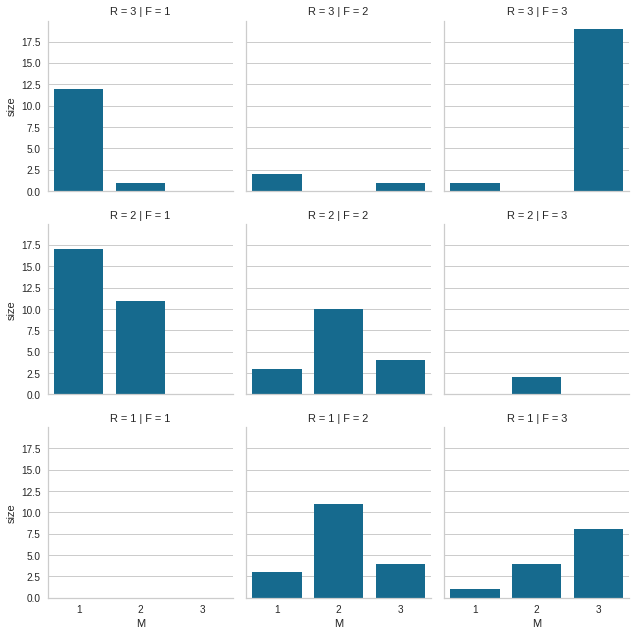

In [31]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

**Recency, Frequency, and MonetaryValue Distribution**

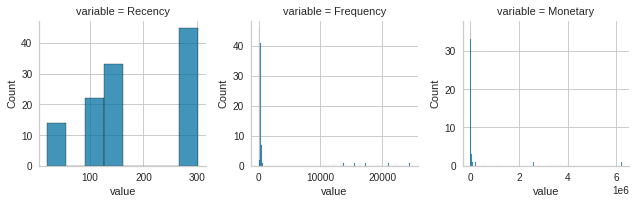

In [32]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","Monetary"]],
     value_vars=["Recency","Frequency", "Monetary"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

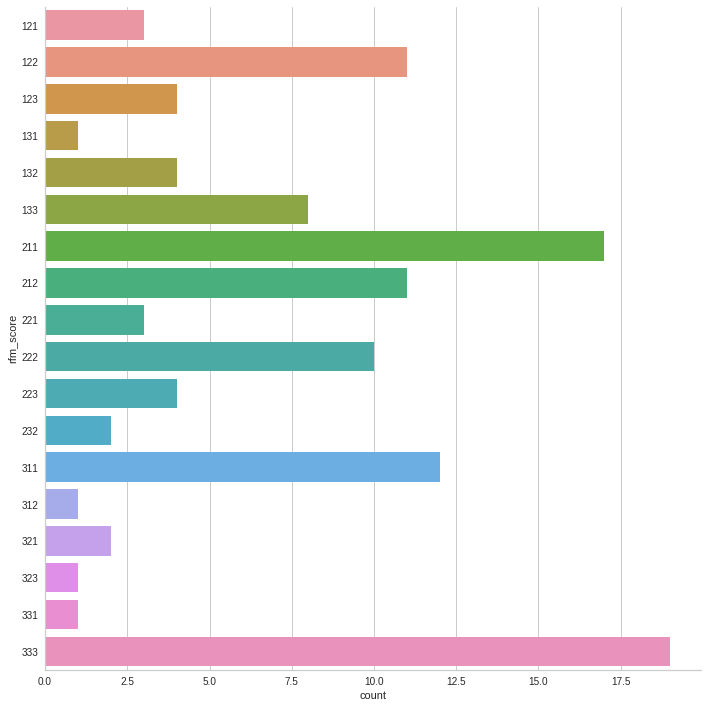

In [33]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [34]:
def category_movement(data):
    if data["rfm_score"] in [333, 233, 323, 332]:
        return "FAST"
    elif data["rfm_score"] in [322, 232, 223, 331, 313, 133]:
        return "MED"
    else:
        return "SLOW"

In [35]:
data_for_model["Category"]=data_for_model.apply(category_movement,axis=1)
data_for_model.head()

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score,Category
0,19,143,64,7256.879885,2,1,1,211,SLOW
1,24,145,74,16653.069852,2,2,2,222,SLOW
2,35,142,65,9386.549972,2,1,1,211,SLOW
3,37,284,262,24626.510213,2,2,2,222,SLOW
4,44,285,305,50354.210668,1,3,3,133,MED


In [37]:
data_for_model.groupby("Category",as_index=False).agg(Total_Count=("SKU","count")).sort_values(by="Total_Count",ascending=False)

,Category,Total_Count
2,SLOW,79
0,FAST,20
1,MED,15


In [38]:
data_for_model.sample(10)

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score,Category
62,771,284,284,3.103245e+04,2,2,3,223,MED
31,306,143,60,1.624855e+04,2,1,2,212,SLOW
21,249,284,287,4.193323e+04,2,2,3,223,MED
44,627,121,10617,1.140771e+06,3,3,3,333,FAST
99,1073,121,15500,2.785518e+06,3,3,3,333,FAST
108,1354,30,483,7.131938e+04,3,3,3,333,FAST
45,642,285,304,2.512830e+04,1,3,2,132,SLOW
76,823,285,306,4.260896e+04,1,3,3,133,MED
29,303,125,35,1.259365e+04,3,1,1,311,SLOW
112,1358,25,434,1.016873e+05,3,3,3,333,FAST


**Conclusion**

As we can see from the plot above, there different characteristic in R,F,M of all SKUs. Sometimes the SKUs have one or two category with high score, while on the same time have low score on another category.
After we create the conditions below :


*   FAST for SKU with RFM score `333, 233, 323, 332`
*   MED for SKU with RFM score `322, 232, 223, 331, 313, 133`
*   SLOW for SKU with RFM score aside from FAST and MED

We get 20 FAST movement category SKUs, 15 MED movement category SKUs, and 79 SLOW movement category SKUs.

# K-Means Clustering

**Scaling**

In [39]:
data_kmeans = data_for_model[['Recency', 'Frequency', 'Monetary']].copy()
data_kmeans.describe()

,Recency,Frequency,Monetary
count,114.000000,114.000000,1.140000e+02
mean,182.456140,1562.675439,2.876134e+05
std,90.302553,4823.325602,9.448229e+05
min,21.000000,10.000000,2.750030e+03
25%,124.000000,65.000000,1.137798e+04
50%,144.000000,280.000000,1.837168e+04
75%,285.000000,308.750000,3.401166e+04
max,302.000000,24515.000000,6.226935e+06


In this session, we will scaling the feature normalize `frequency` and `monetary` column, and `recency` using standardization. This would be different because `recency` have normal distribution while the others not.

In [40]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['Frequency', 'Monetary']

for col in norm_col:
  data_kmeans[col] = MinMaxScaler().fit_transform(data_kmeans[col].values.reshape(len(data_kmeans), 1))

# Standardization
data_kmeans['Recency'] = StandardScaler().fit_transform(data_kmeans['Recency'].values.reshape(len(data_kmeans), 1))

data_kmeans

,Recency,Frequency,Monetary
0,-0.438862,0.002204,0.000724
1,-0.416616,0.002612,0.002234
2,-0.449985,0.002244,0.001066
3,1.129450,0.010284,0.003515
4,1.140572,0.012038,0.007648
...,...,...,...
109,-1.706858,0.019343,0.036794
110,-1.729104,0.014364,0.014879
111,-1.729104,0.008080,0.005883
112,-1.751349,0.017303,0.015896


**Find the best K**

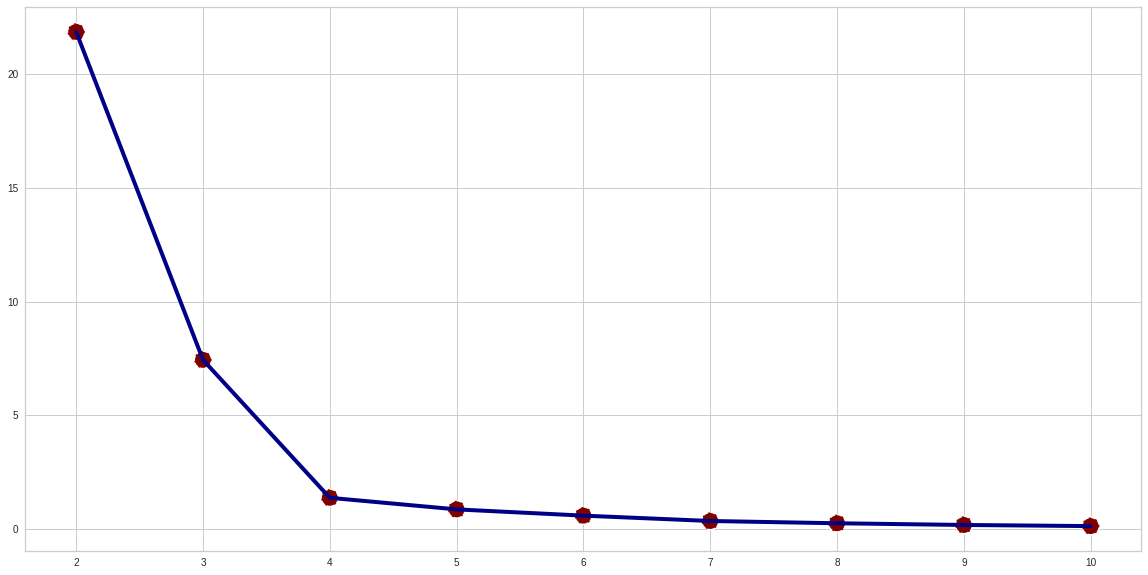

In [41]:
# Inertia
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_kmeans)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

From the inertia above, we can see that K = 3 and K = 4 most likely the best K because there isn't significant decrease for the next K.

**Modelling**

In [42]:
# From the inertia, we decide to choose number 3 since it's more like the start of stable decrease from the values.
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_kmeans)

In [43]:
# Made ane array of cluster labels
clusters = kmeans.labels_

In [44]:
# Assign labels to dataframe
data_kmeans['clusters'] = clusters
data_kmeans.head(5)

,Recency,Frequency,Monetary,clusters
0,-0.438862,0.002204,0.000724,0
1,-0.416616,0.002612,0.002234,0
2,-0.449985,0.002244,0.001066,0
3,1.129450,0.010284,0.003515,1
4,1.140572,0.012038,0.007648,1


In [45]:
data_kmeans.groupby('clusters').median()

,Recency,Frequency,Monetary
clusters,,,
0,-0.438862,0.002204,0.001510
1,1.140572,0.011753,0.003282
2,-1.651244,0.017466,0.015086


In [46]:
df_radar = pd.DataFrame(data_kmeans.groupby('clusters').median(), columns=list(data_kmeans))
df_radar = df_radar.drop(columns='clusters', axis=1)
df_radar

,Recency,Frequency,Monetary
clusters,,,
0,-0.438862,0.002204,0.001510
1,1.140572,0.011753,0.003282
2,-1.651244,0.017466,0.015086


In [47]:
# Standardization Data Radar
for col in df_radar.columns:
  df_radar[col] = StandardScaler().fit_transform(df_radar[col].values.reshape(len(df_radar), 1))

In [48]:
df_radar

,Recency,Frequency,Monetary
clusters,,,
0,-0.107040,-1.313595,-0.848965
1,1.274752,0.203089,-0.555030
2,-1.167712,1.110506,1.403995


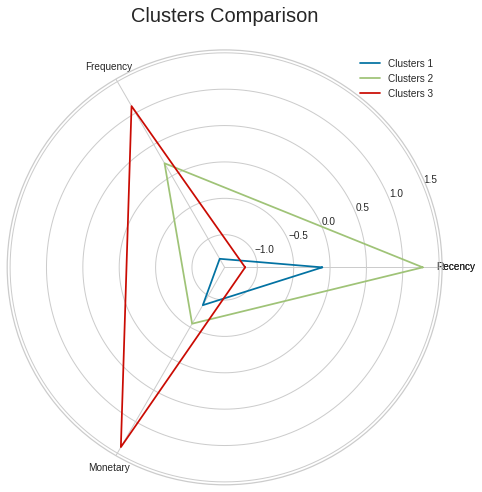

In [49]:
categories = list(df_radar)
categories = [*categories, categories[0]]

Clusters_1 = df_radar.loc[0].values.tolist()
Clusters_2 = df_radar.loc[1].values.tolist()
Clusters_3 = df_radar.loc[2].values.tolist()
Clusters_1 = [*Clusters_1, Clusters_1[0]]
Clusters_2 = [*Clusters_2, Clusters_2[0]]
Clusters_3 = [*Clusters_3, Clusters_3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Clusters 1')
plt.plot(label_loc, Clusters_2, label='Clusters 2')
plt.plot(label_loc, Clusters_3, label='Clusters 3')
plt.title('Clusters Comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

**Cluster 1 - SLOW movement**

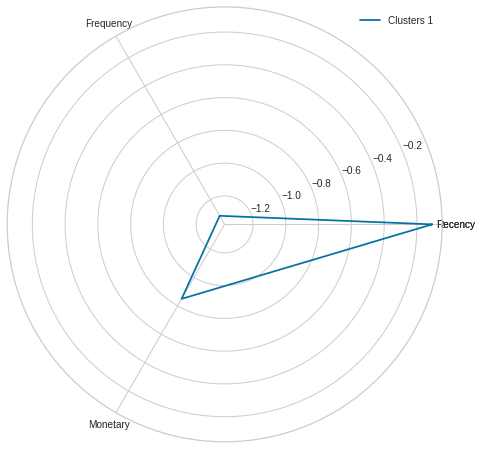

In [50]:
Clusters_1 = df_radar.loc[0].values.tolist()
Clusters_1 = [*Clusters_1, Clusters_1[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Clusters 1')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

This SLOW movement filled by SKUs with slow retentional activities and low frequency of order. We could place all SKUs on this category on the farest storage.

**Cluster 2 - MED movement**

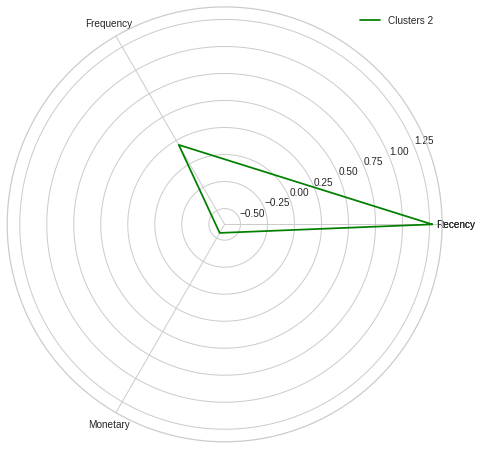

In [51]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_2, label='Clusters 2', color='green')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

These category filled with SKUs with MED movement category, in which have average in value in monetary value and order frequencies but have more slower retention rate than SLOW movement. These SKUs can put on the middle-farest storage.

**Cluster 3 - FAST movement**

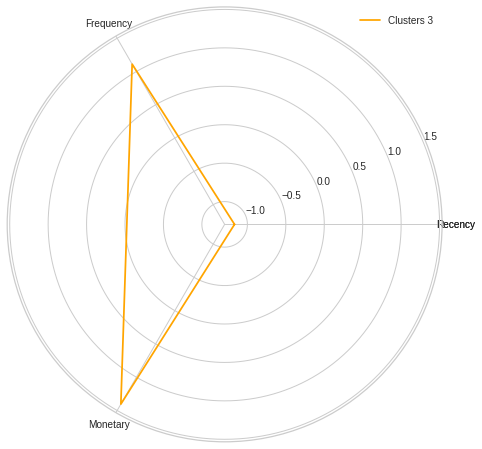

In [52]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_3))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_3, label='Clusters 3', color='orange')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

For the FAST movement SKUs have all best criteria in 3 point of our analysis : high frequency order, huge monetary value, and fastest retention rate. These SKUs should be put as near as possible from the packing area so it will reduce the cycle time very much in order to cut lead time and produce more benefit to the company.

In [61]:
data_for_model.groupby("cluster",as_index=False).agg(Total_Count=("SKU","count")).sort_values(by="Total_Count",ascending=False)

,cluster,Total_Count
2,SLOW,55
1,MED,45
0,FAST,14


**Conclusion**

There are difference on output of RFM analysis and K-Means machine learning for categorized movement. In the K-Means clustering we got 14 FAST movement category SKUs (-6 from RFM), 45 MED movement category SKUs (+30 from RFM), and 55 SLOW movement category SKUs (-24 from RFM).

However, there are the recommendation from K-Means that we actually could separate from 3 cluster to 4 cluster movement. It will create more detailed movement but also we should consider the warehouse space in order to accomodate 4 different categories movement.

# Data Simulation

In [53]:
data_for_model['cluster'] = clusters
data_for_model

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score,Category,cluster
0,19,143,64,7256.879885,2,1,1,211,SLOW,0
1,24,145,74,16653.069852,2,2,2,222,SLOW,0
2,35,142,65,9386.549972,2,1,1,211,SLOW,0
3,37,284,262,24626.510213,2,2,2,222,SLOW,1
4,44,285,305,50354.210668,1,3,3,133,MED,1
...,...,...,...,...,...,...,...,...,...,...
109,1355,29,484,231765.460292,3,3,3,333,FAST,2
110,1356,27,362,95358.110288,3,3,3,333,FAST,2
111,1357,27,208,39365.709993,3,2,3,323,FAST,2
112,1358,25,434,101687.289866,3,3,3,333,FAST,2


In [54]:
# Change cluster to FAST, MED, SLOW
data_for_model.loc[data_for_model["cluster"] == 2, "cluster"] = "FAST"
data_for_model.loc[data_for_model["cluster"] == 1, "cluster"] = "MED"
data_for_model.loc[data_for_model["cluster"] == 0, "cluster"] = "SLOW"
data_for_model

,SKU,Recency,Frequency,Monetary,R,F,M,rfm_score,Category,cluster
0,19,143,64,7256.879885,2,1,1,211,SLOW,SLOW
1,24,145,74,16653.069852,2,2,2,222,SLOW,SLOW
2,35,142,65,9386.549972,2,1,1,211,SLOW,SLOW
3,37,284,262,24626.510213,2,2,2,222,SLOW,MED
4,44,285,305,50354.210668,1,3,3,133,MED,MED
...,...,...,...,...,...,...,...,...,...,...
109,1355,29,484,231765.460292,3,3,3,333,FAST,FAST
110,1356,27,362,95358.110288,3,3,3,333,FAST,FAST
111,1357,27,208,39365.709993,3,2,3,323,FAST,FAST
112,1358,25,434,101687.289866,3,3,3,333,FAST,FAST


In [55]:
# Take Sample one SKU with fast movement
data_fast = data_for_model[data_for_model["cluster"] == "FAST"].copy()
data_fast["SKU"].unique()

array([1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356,
       1357, 1358, 1359])

In [56]:
data_sample = data_fast.groupby('SKU').median().copy()
data_sample

,Recency,Frequency,Monetary,rfm_score
SKU,,,,
1346,45.0,405.0,11303.420033,331.0
1347,43.0,207.0,10957.400143,321.0
1348,41.0,271.0,2750.029998,321.0
1349,41.0,592.0,240496.679017,333.0
1350,39.0,652.0,209268.380555,333.0
1351,38.0,442.0,595395.000000,333.0
1352,36.0,431.0,97937.559815,333.0
1353,32.0,484.0,200704.870333,333.0
1354,30.0,483.0,71319.379686,333.0


Let's say we want to take `SKU 1347` as sample.
SKU 1347 =
*   RECENCY = 43
*   FREQUENCY = 207
*   MONETARY = 10958

In [57]:
data_sample.loc[(data_sample.index == 1357)]

,Recency,Frequency,Monetary,rfm_score
SKU,,,,
1357,27.0,208.0,39365.709993,323.0


In [58]:
# Make function for data simulation
def data_sim(sku,min_before,min_after,work_hour):
  value1 = data_sample.loc[(data_sample.index == sku)]['Monetary'].values/data_sample.loc[(data_sample.index == sku)]['Frequency'].values
  print("For one piece of SKU ",sku," we will get : USD",value1)
  processbefore = (work_hour * 60) / min_before
  monetbefore = processbefore * data_sample.loc[(data_sample.index == sku)]['Monetary'].values
  print("With assume that working hour for one shift is ",work_hour," hours. We can process ",processbefore," pcs of the SKU.")
  print("And then we get monetary value at USD ",monetbefore)
  processafter = (work_hour * 60) / min_after
  monetafter = processafter * data_sample.loc[(data_sample.index == sku)]['Monetary'].values
  diffinmonet = monetafter - monetbefore
  percentagemonet = (diffinmonet / monetbefore ) * 100
  print("However, if we put it on the FAST category and reduce the processing leadtime we can process ",processafter, " pcs of the SKU.")
  print("Impact of that, we can get monetary value at USD ",monetafter,". It's ", diffinmonet, "more than previous method. Which is raise ", percentagemonet, "% of previous SKU monetary value.")

In [59]:
data_sim(1347, 3, 2, 8)

For one piece of SKU  1347  we will get : USD [52.93430021]
With assume that working hour for one shift is  8  hours. We can process  160.0  pcs of the SKU.
And then we get monetary value at USD  [1753184.0228416]
However, if we put it on the FAST category and reduce the processing leadtime we can process  240.0  pcs of the SKU.
Impact of that, we can get monetary value at USD  [2629776.0342624] . It's  [876592.0114208] more than previous method. Which is raise  [50.] % of previous SKU monetary value.
